In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# === Load your data ===
df = pd.read_csv("gd_convergence_log.csv")
#xy_df = pd.read_csv("X-and-y-train.csv")

# === Extract training data ===
#X_train = xy_df[[col for col in xy_df.columns if col.startswith("feature_")]].to_numpy()
#y_train = xy_df["y_train"].to_numpy()


In [3]:

# === Extract weights, bias, and iteration logs ===
weights = df[[col for col in df.columns if col.startswith("w")]].to_numpy()
biases = df["bias"].to_numpy()
iterations = df["iteration"].to_numpy()

# === Choose the feature for animation and others for static scatter plots ===
feature_indices = [6, 7, 8, 9]  # 👈 Customize your features here
animated_feature_index = feature_indices[-1]  # Animate the last one

# === Feature value arrays ===
x_features = [X_train[:, i] for i in feature_indices]
x_animated = x_features[-1]

# === Set up the x-axis line for the animated regression line ===
x_min, x_max = x_animated.min(), x_animated.max()
x_line = np.linspace(x_min, x_max, 100)

# === Set up the plot ===
fig, ax = plt.subplots(figsize=(10, 6), facecolor='black')
ax.set_facecolor('black')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_train.min(), y_train.max())
ax.set_xlabel(f"Feature {animated_feature_index}", color='white')
ax.set_ylabel("Target / Prediction", color='white')
ax.set_title("Evolving Regression Line vs Ground Truth (Dark Theme)", color='white')

# === Style the axes ===
ax.tick_params(colors='white')
for spine in ax.spines.values():
    spine.set_color('white')

# === Scatter plots for each feature ===
colors = ['red', 'blue', 'green', 'magenta']
labels = [f"Feature {i}" for i in feature_indices]

for i in range(4):
    ax.scatter(x_features[i], y_train, color=colors[i], alpha=0.5, label=labels[i])

# === Animated regression line and iteration text ===
reg_line, = ax.plot([], [], color='lime', lw=3, label='Animated Prediction Line')
iteration_text = ax.text(0.05, 0.95, '', transform=ax.transAxes,
                         fontsize=12, verticalalignment='top', color='white')

# === Legend text color fix ===
legend = ax.legend(facecolor='black', edgecolor='white')
for text in legend.get_texts():
    text.set_color('white')

# === Initialization function ===
def init():
    reg_line.set_data([], [])
    iteration_text.set_text('')
    return reg_line, iteration_text

# === Update function ===
def update(frame):
    w = weights[frame][animated_feature_index]
    b = biases[frame]
    y_pred_line = w * x_line + b
    reg_line.set_data(x_line, y_pred_line)
    iteration_text.set_text(f"Iteration: {iterations[frame]}")
    return reg_line, iteration_text

# === Create animation ===
anim = animation.FuncAnimation(
    fig, update, frames=len(weights),
    init_func=init, blit=True, interval=300, repeat=False
)

# === Show or Save ===


NameError: name 'X_train' is not defined

In [ ]:
# === Create animation ===
anim = animation.FuncAnimation(
    fig, update, frames=len(weights),
    init_func=init, blit=True, interval=300, repeat=False
)

# Save as GIF without Bash
anim.save("regression_animation.gif", writer='pillow', fps=5)

# Optional: Show animation in notebook
# from IPython.display import HTML
# HTML(anim.to_jshtml())


IndexError: list index out of range

ValueError: zero-size array to reduction operation minimum which has no identity

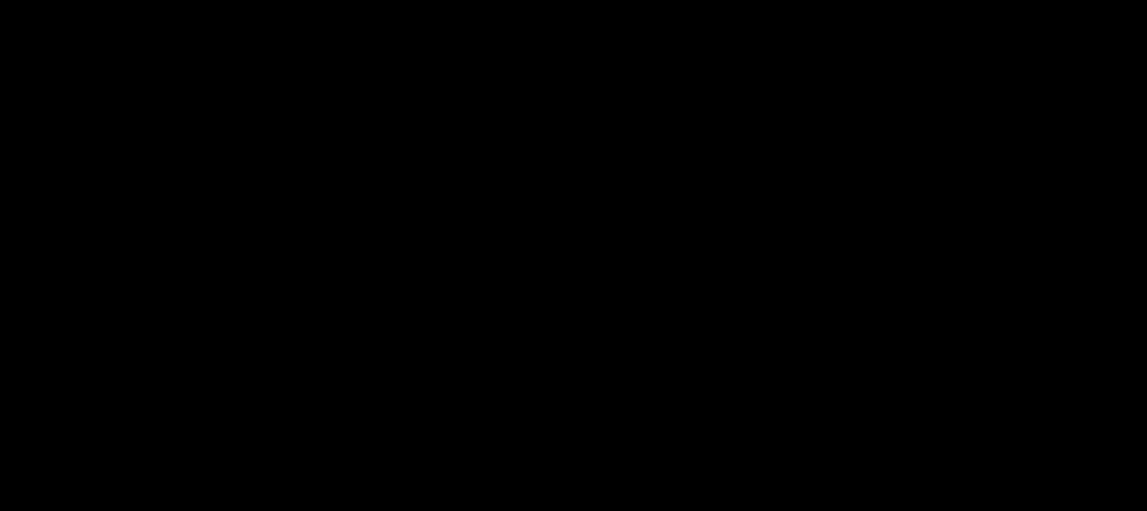

In [ ]:
# === Extract weights and iterations ===
weight_columns = [col for col in df.columns if col.startswith('w')]
iterations = df["iteration"].to_numpy()
weights_matrix = df[weight_columns].to_numpy()
num_weights = weights_matrix.shape[1]

# === Split the data ===
split_1 = iterations <= 5000
split_2 = iterations >= 6000

iter_1 = iterations[split_1]
weights_1 = weights_matrix[split_1]

iter_2 = iterations[split_2]
weights_2 = weights_matrix[split_2]

frames_1 = len(iter_1)
frames_2 = len(iter_2)
max_frames = max(frames_1, frames_2)

# === Set up figure with black background and two subplots ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), facecolor='black')
ax1.set_facecolor('black')
ax2.set_facecolor('black')

# === Shared colors and limits ===
colors = plt.cm.viridis(np.linspace(0, 1, num_weights))
ymin = min(np.min(weights_1), np.min(weights_2)) - 0.1
ymax = max(np.max(weights_1), np.max(weights_2)) + 0.1

# === Subplot 1: Iterations 0–5000 ===
lines_1 = []
for i in range(num_weights):
    (line,) = ax1.plot([], [], linewidth=2, color=colors[i], label=weight_columns[i])
    lines_1.append(line)
ax1.set_xlim(iter_1[0], iter_1[-1])
ax1.set_ylim(ymin, ymax)
ax1.set_title("Iterations 0–5000", color='white')
ax1.set_xlabel("Iteration", color='white')
ax1.set_ylabel("Weight Value", color='white')
ax1.tick_params(colors='white')
for spine in ax1.spines.values():
    spine.set_color('white')
ax1.grid(True, linestyle=':', color='green', alpha=0.3)
legend1 = ax1.legend(loc='best')
for text in legend1.get_texts():
    text.set_color('white')
legend1.get_frame().set_facecolor('black')
legend1.get_frame().set_edgecolor('white')

# === Subplot 2: Iterations 6000–end ===
lines_2 = []
for i in range(num_weights):
    (line,) = ax2.plot([], [], linewidth=2, color=colors[i])
    lines_2.append(line)
ax2.set_xlim(iter_2[0], iter_2[-1])
ax2.set_ylim(ymin, ymax)
ax2.set_title("Iterations 6000–End", color='white')
ax2.set_xlabel("Iteration", color='white')
ax2.tick_params(colors='white')
for spine in ax2.spines.values():
    spine.set_color('white')
ax2.grid(True, linestyle=':', color='green', alpha=0.3)

# === Init function ===
def init():
    for line in lines_1 + lines_2:
        line.set_data([], [])
    return lines_1 + lines_2

# === Update function ===
def update(frame):
    f1 = min(frame, frames_1 - 1)
    f2 = min(frame, frames_2 - 1)
    for i in range(num_weights):
        lines_1[i].set_data(iter_1[:f1+1], weights_1[:f1+1, i])
        lines_2[i].set_data(iter_2[:f2+1], weights_2[:f2+1, i])
    return lines_1 + lines_2

# === Create animation ===
ani = animation.FuncAnimation(
    fig, update, frames=max_frames,
    init_func=init, blit=True, interval=100, repeat=False
)

# === Show plot ===

HTML(ani.to_jshtml())

In [ ]:
ani.save("weights_convergence.gif", writer='pillow', fps=10)


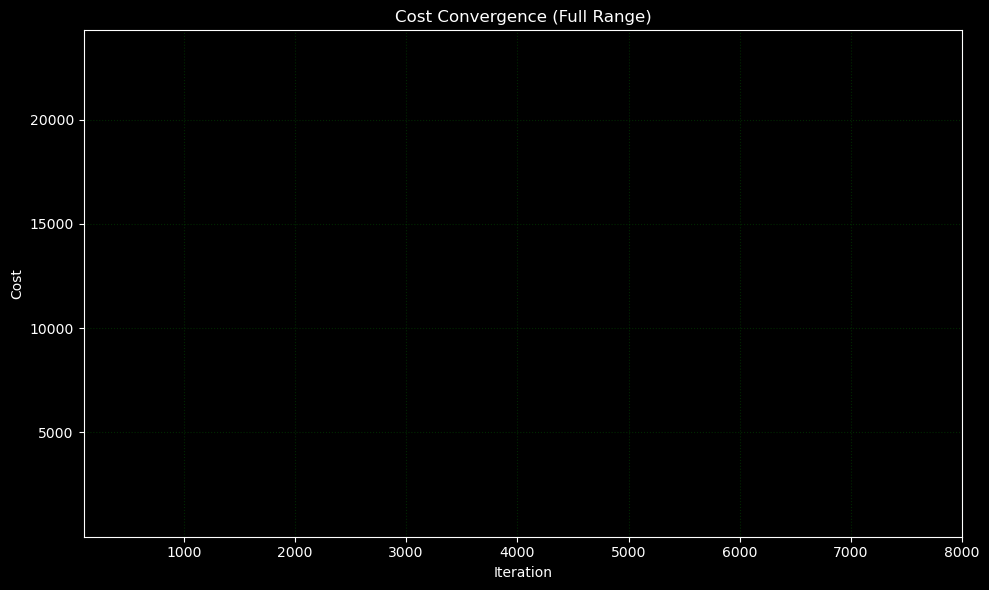

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# === Extract iteration and cost ===
iterations = df["iteration"].to_numpy()
costs = df["cost"].to_numpy()  # change to "loss" if needed

# === Set up the figure ===
fig, ax = plt.subplots(figsize=(10, 6), facecolor='black')
ax.set_facecolor('black')

# === Plot line ===
(cost_line,) = ax.plot([], [], color='lime', linewidth=2)

# === Axes settings ===
ax.set_xlim(iterations[0], iterations[-1])
ax.set_ylim(np.min(costs) * 0.95, np.max(costs) * 1.05)
ax.set_title("Cost Convergence (Full Range)", color='white')
ax.set_xlabel("Iteration", color='white')
ax.set_ylabel("Cost", color='white')
ax.tick_params(colors='white')
for spine in ax.spines.values():
    spine.set_color('white')
ax.grid(True, linestyle=':', color='green', alpha=0.3)

# === Init function ===
def init():
    cost_line.set_data([], [])
    return cost_line,

# === Update function ===
def update(frame):
    f = min(frame, len(iterations) - 1)
    cost_line.set_data(iterations[:f + 1], costs[:f + 1])
    return cost_line,

# === Create animation ===
ani = animation.FuncAnimation(
    fig, update, frames=len(iterations),
    init_func=init, blit=True, interval=100, repeat=False
)

plt.tight_layout()
plt.show()

# === Display as HTML (if in notebook) ===
HTML(ani.to_jshtml())


In [3]:
ani.save("cost_convergence.gif", writer='pillow', fps=30)
